<a href="https://colab.research.google.com/github/Vaishnavi-Tumuluri/WineQualityPrediction/blob/main/Wine_Quality_Prediction_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Import the Dataset**

In [36]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [38]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [39]:
df.shape

(1596, 12)

**Plot Histograms of the features**

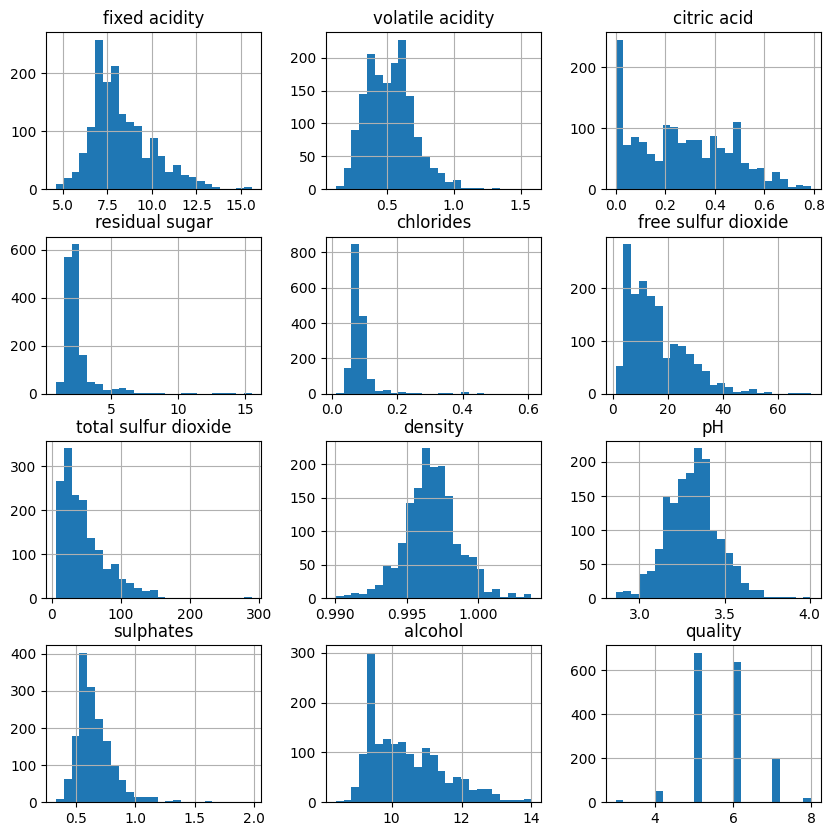

In [40]:
df.hist(bins=25, figsize=(10, 10))
plt.show()

**Bar Graph of Quality vs Alcohol**

Text(0, 0.5, 'alcohol')

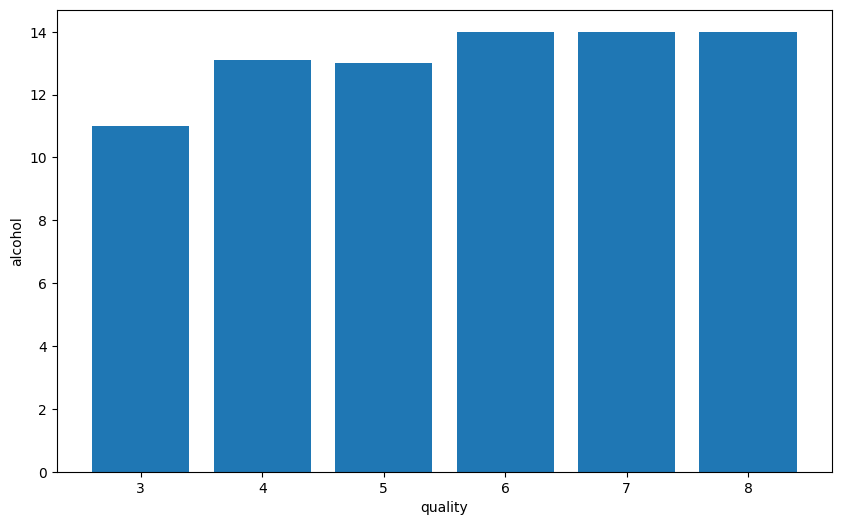

In [41]:
plt.figure(figsize=[10, 6])
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')

**Perform Analysis by Visualizing the Correlation Matrix**

<Axes: >

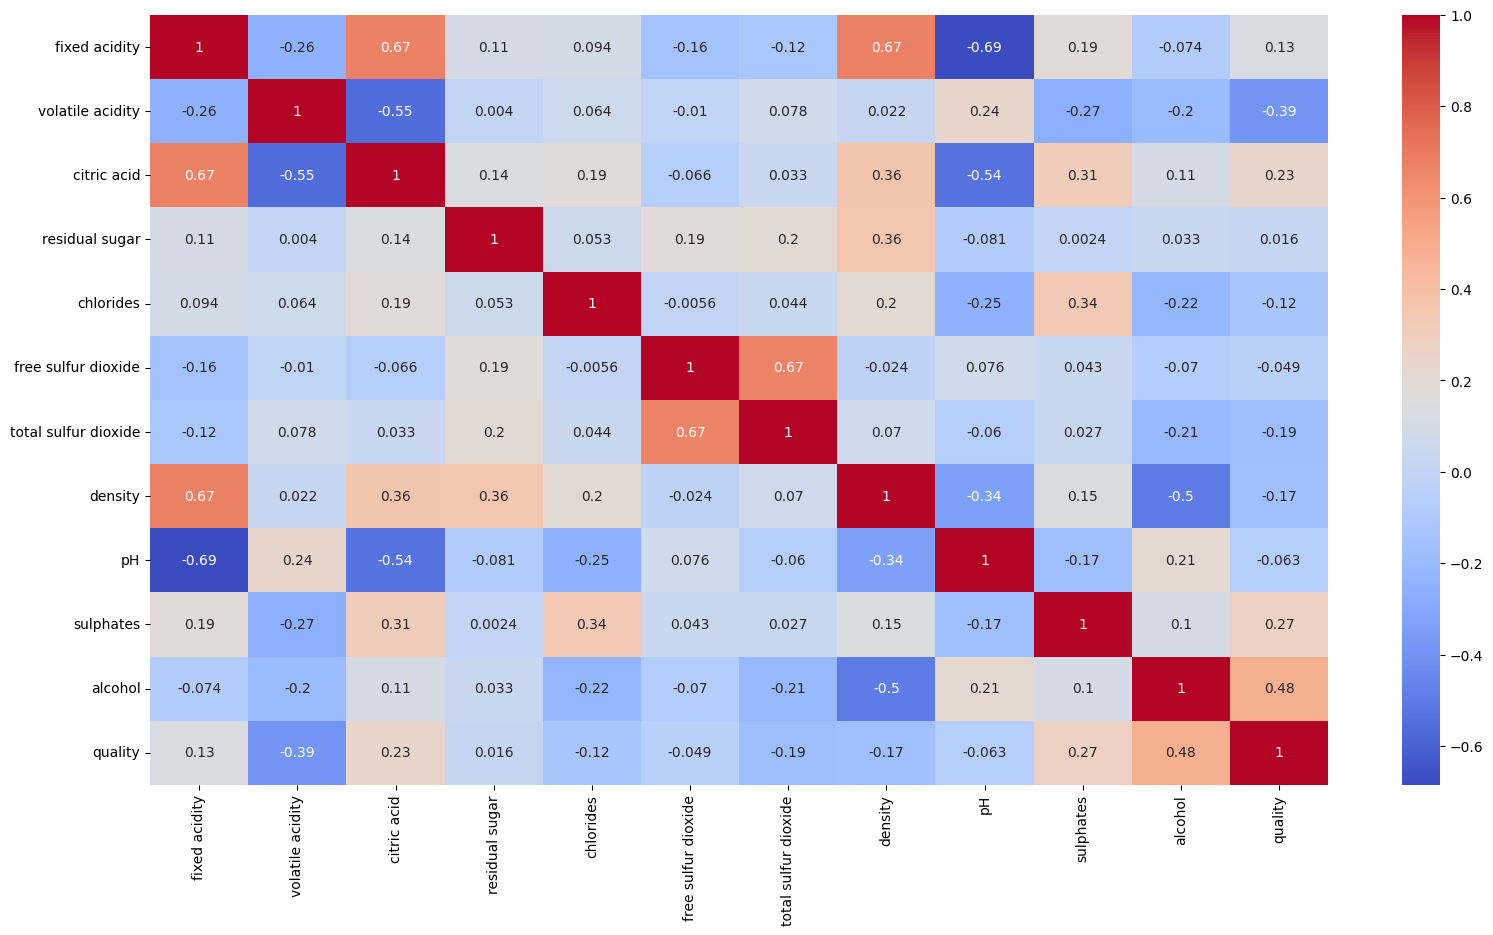

In [42]:
correlation_matrix = df.corr()
plt.figure(figsize=[19, 10])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

**Create a new Dataframe without the 'Total Sulfur Dioxide' column**

In [43]:
new_data = df.drop('total sulfur dioxide', axis=1)

**Check for missing values in the new Dataframe(Data Cleaning) **bold text**

In [44]:
new_data_missing = new_data.isnull().sum()

**Split the Data into Features(x) and Target Variable (y)**

In [45]:
x=df.drop('quality', axis=1)
y=df['quality']

**Split the Data into Training and Testing Sets**

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Create a Linear Regression Model**

In [47]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

**Make Predictions on the Test Set**

In [48]:
y_pred = linear_reg.predict(x_test)

**Visualize the distribution of Differences between Actual and Predicted Values**

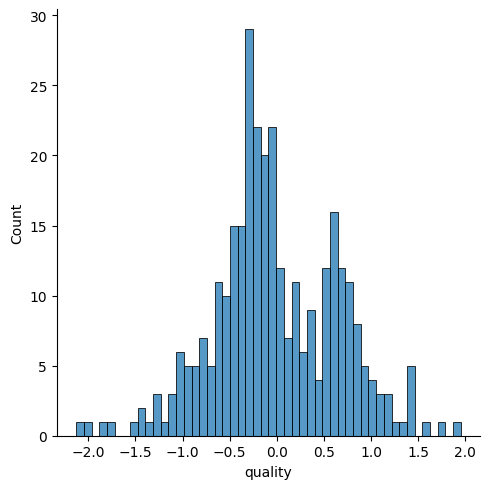

In [49]:
sns.displot((y_test - y_pred), bins = 50)

**Calculate Evaluation Metrics**

In [50]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Root Mean Squared Error:', rmse)
print('R-squared Score:', r2)
print('Mean Absolute Error:', mae)

Root Mean Squared Error: 0.6630607109116159
R-squared Score: 0.3382412510368388
Mean Absolute Error: 0.525365687469168
